Import Library & Package

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

Load Dataset

In [59]:
file_path = "../dataset/data_balita.csv"
df = pd.read_csv(file_path)
df.head(10)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
5,0,laki-laki,44.257719,stunted
6,0,laki-laki,59.572523,tinggi
7,0,laki-laki,42.701796,severely stunted
8,0,laki-laki,45.251779,stunted
9,0,laki-laki,57.201961,tinggi


Visualisasi jumlah dan persentase jenis kelamin

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19716\3244495923.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="colorblind")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19716\3244495923.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = gender_percentages[i]


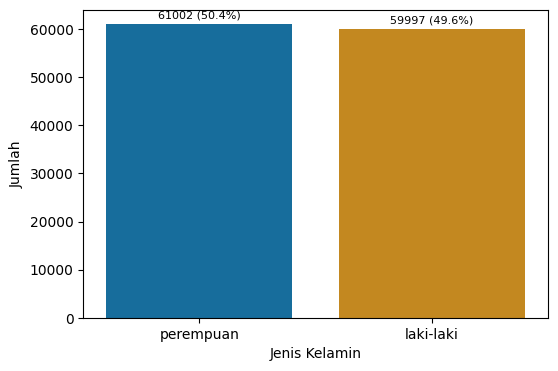

In [61]:
gender_counts = df["Jenis Kelamin"].value_counts()
total_data = len(df)
gender_percentages = (gender_counts / total_data) * 100

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="colorblind")

for i, v in enumerate(gender_counts.values):
    percentage = gender_percentages[i]
    offset = max(0.02 * v, 2)
    ax.text(i, v + offset, f"{v} ({percentage:.1f}%)", ha='center', fontsize=8)

plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.show()

Visualisasi jumlah Status Gizi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19716\3715542325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19716\3715542325.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = status_percentages[i]


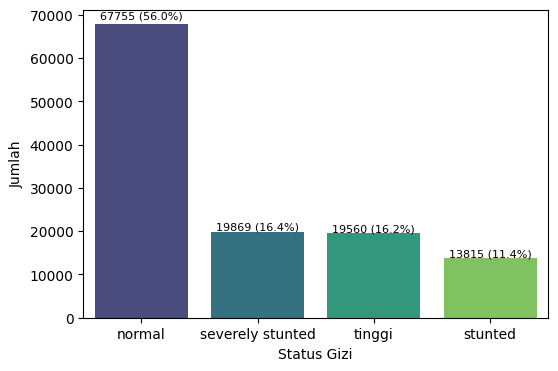

In [62]:
status_counts = df["Status Gizi"].value_counts()
total_data = len(df)
status_percentages = (status_counts / total_data) * 100

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")

for i, v in enumerate(status_counts.values):
    percentage = status_percentages[i]
    offset = max(0.02 * v, 1)
    ax.text(i, v + offset, f"{v} ({percentage:.1f}%)", ha='center', fontsize=8)

plt.xlabel("Status Gizi")
plt.ylabel("Jumlah")
plt.show()

Visualisasi jumlah Status Gizi berdasarkan Jenis Kelamin

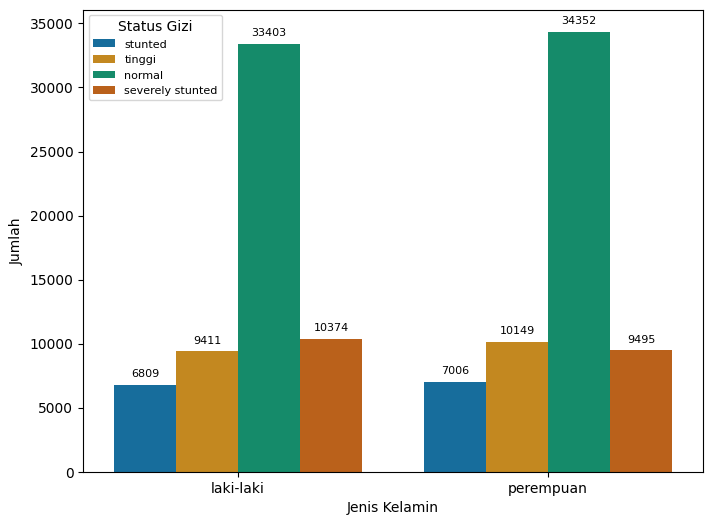

In [63]:
gender_status_counts = df.groupby("Jenis Kelamin")["Status Gizi"].value_counts().unstack()
gender_totals = df["Jenis Kelamin"].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Jenis Kelamin", hue="Status Gizi", data=df, palette="colorblind")

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            x_pos = bar.get_x() + bar.get_width() / 2 
            ax.text(x_pos, height + 0.01 * max(gender_totals), f"{int(height)}",
                    ha='center', fontsize=8, color='black')

plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.legend(title="Status Gizi", loc='upper left', fontsize=8)
plt.show()


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


Periksa Missing Value

In [60]:
mv = df.isnull().sum()
print(mv)

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64


Encoding fitur kategori (Jenis Kelamin dan Status Gizi)

In [65]:
label_encoders = {}
for col in ["Jenis Kelamin", "Status Gizi"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Pisahkan fitur (X) dan target (y)

In [66]:
X = df[["Umur (bulan)", "Jenis Kelamin", "Tinggi Badan (cm)"]]
y = df["Status Gizi"]

Oversampling

In [67]:
print("Distribusi sebelum SMOTE:", Counter(y))

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Status Gizi"] = y_resampled

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Status Gizi"] = y_resampled

print("Distribusi setelah SMOTE:", Counter(y_resampled))

Distribusi sebelum SMOTE: Counter({0: 67755, 1: 19869, 3: 19560, 2: 13815})
Distribusi setelah SMOTE: Counter({2: 67755, 3: 67755, 0: 67755, 1: 67755})


Split dataset menjadi train dan test (80% training, 20% testing)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Inisialisasi dan latih model Random Forest

In [70]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

Prediksi pada data uji

In [71]:
y_pred = rf_model.predict(X_test)

Evaluasi model

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoders["Status Gizi"].classes_))

Akurasi Model: 0.9943

Classification Report:
                   precision    recall  f1-score   support

          normal       0.99      1.00      1.00     13382
severely stunted       1.00      1.00      1.00      4130
         stunted       0.99      0.98      0.98      2790
          tinggi       1.00      0.99      0.99      3898

        accuracy                           0.99     24200
       macro avg       0.99      0.99      0.99     24200
    weighted avg       0.99      0.99      0.99     24200



Visualisasi ROC & AUC

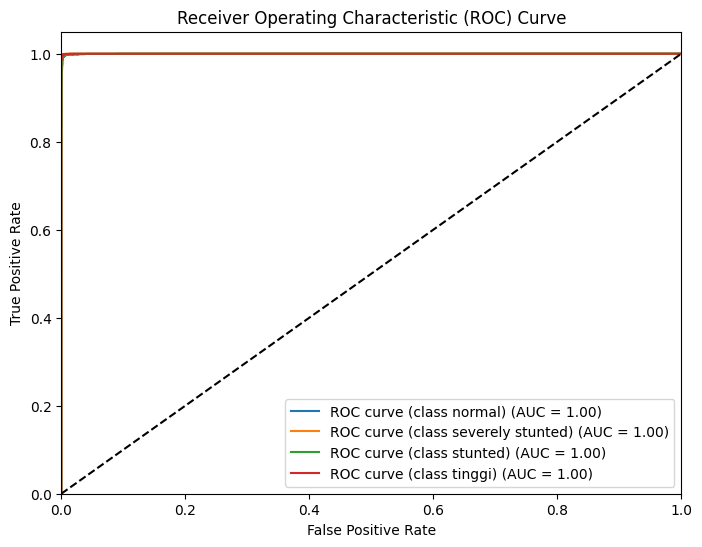

In [73]:
n_classes = len(label_encoders["Status Gizi"].classes_)
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_score = rf_model.predict_proba(X_test)
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {label_encoders["Status Gizi"].classes_[i]}) (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Simpan model

In [74]:
joblib.dump(rf_model, "../model/gizi_model.pkl")
joblib.dump(label_encoders, "../model/label_encoders.pkl")
print("Model berhasil disimpan'")

Model berhasil disimpan'


Pengujian Model

In [76]:
loaded_model = joblib.load("../model/gizi_model.pkl")
while True:
    try:
        umur = int(input("Masukkan umur (bulan): "))
        jenis_kelamin = input("Masukkan jenis kelamin (L/P): ").strip().upper()
        tinggi_badan = float(input("Masukkan tinggi badan (cm): "))
        
        if jenis_kelamin == "L":
            jenis_kelamin = label_encoders["Jenis Kelamin"].transform(["laki-laki"])[0]
        elif jenis_kelamin == "P":
            jenis_kelamin = label_encoders["Jenis Kelamin"].transform(["perempuan"])[0]
        else:
            print("Jenis kelamin tidak valid. Gunakan 'L' atau 'P'.")
            continue
        
        input_data = pd.DataFrame([[umur, jenis_kelamin, tinggi_badan]], columns=["Umur (bulan)", "Jenis Kelamin", "Tinggi Badan (cm)"])
        prediksi = loaded_model.predict(input_data)[0]
        status_gizi = label_encoders["Status Gizi"].inverse_transform([prediksi])[0]
        
        print(f"Prediksi Status Gizi: {status_gizi}")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")
    
    ulang = input("Ingin menginput data lagi? (y/n): ").strip().lower()
    if ulang != 'y':
        break


Prediksi Status Gizi: normal
